In [ ]:
'''

This notebook demonstrates why summary statistics can be misleading. It plots certain graphs having very similar summary
statistics like mean median. But while plotting them on a graph, we see they look very different.


'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
%matplotlib notebook
from IPython import display
!pip install ffmpeg

You should consider upgrading via the 'C:\Users\saura\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('../Data Files/DatasaurusDozen.tsv',sep='\t')
data.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
data['dataset'].nunique()

13

In [4]:
def return_statistics(x):
    return (x['x'].mean(),x['y'].mean(),x['x'].std(),x['y'].std())

In [5]:
data.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [6]:
mapper = data.groupby('dataset').apply(return_statistics).to_dict()

In [7]:
reverse_mapper = {}
k=0
for key in mapper.keys():
    reverse_mapper[k] = key
    k += 1
reverse_mapper

{0: 'away',
 1: 'bullseye',
 2: 'circle',
 3: 'dino',
 4: 'dots',
 5: 'h_lines',
 6: 'high_lines',
 7: 'slant_down',
 8: 'slant_up',
 9: 'star',
 10: 'v_lines',
 11: 'wide_lines',
 12: 'x_shape'}

<IPython.core.display.Javascript object>


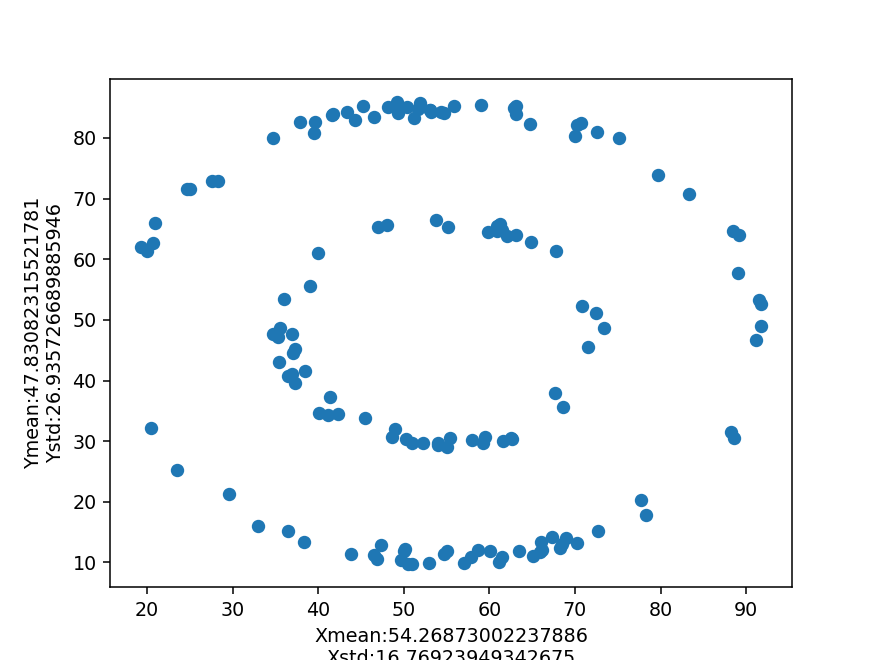

In [9]:
fig = plt.Figure(figsize=(20,15))
fig,ax = plt.subplots()


def animate(i):
    ax.clear()
    new_i = i%13
    val = reverse_mapper[new_i]
    
    x = data[data.dataset == val]['x']
    y = data[data.dataset == val]['y']
    
    xm,ym,xstd,ystd = mapper[val]
    
    plt.xlabel(f'Xmean:{xm}\nXstd:{xstd}')
    plt.ylabel(f'Ymean:{ym}\nYstd:{ystd}')
    ax.scatter(x,y)
    
anim = FuncAnimation(fig, animate,
                     frames = 30, interval = 1000)
plt.show()